<a href="https://colab.research.google.com/github/ThanuMahee12/ayush-vision/blob/mobile-net/Algorithums/pretrained/MobileNetV3/MobileNetV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MobileNet v3

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive') # drive activate for Use

Mounted at /content/drive


In [ ]:
!pip install firebase-admin

## Imports

### Collab Imports

In [4]:
firebase_count=1

### Default Nessary Imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import date,datetime
import json
import csv

### Tensorflow Imports

In [6]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D,Dropout
import firebase_admin
from firebase_admin import credentials,storage
from firebase_admin import firestore

## Variables

### Path variables

In [7]:
dataset_dir='/content/drive/MyDrive/AYUSHVISION/preTrained/final' #datasetbase dirctory

In [8]:
epochs=10

In [9]:
document_id=f'{datetime.now().strftime("%Y_%m_%d_%H")}_{epochs}'
storageLocation=f'training/mobile_net/'

In [10]:
working_dir=f'/content/drive/MyDrive/AYUSHVISION/ready/{document_id}'

In [11]:
dataset_train_dir=os.path.join(dataset_dir,'train')
dataset_test_dir=os.path.join(dataset_dir,'test')
dataset_val_dir=os.path.join(dataset_dir,'val')

### Genrator Variable

In [12]:
rescale=1/255

### Configration Variables

In [13]:
target_size=(224,224)
class_mode='categorical'
input_shape=(224,224,3)

### Model Variables

#### Number If Classes

In [14]:
no_of_classes=32

## Envirumentatl Setup

### Collab

## Firebase

In [15]:

if firebase_count==1:
  cred = credentials.Certificate("/content/drive/MyDrive/ServiceKey.json")
  firebase_admin.initialize_app(cred,{
    'storageBucket': 'ayush-vision-asw4gh.appspot.com'
})
firebase_count=firebase_count+1

In [16]:
db = firestore.client()

In [17]:
bucket = storage.bucket()

In [18]:
dcnn_ref = db.collection("training1").document('mobile-net')
doc = dcnn_ref.get()

In [19]:
if not doc.exists:
  doc_ref= db.collection("training1").document('mobile-net')
  doc_ref.set({'algorithum':'mobile-net','version':'1','mode':'classification','url':'mobile-net'})
else:
  doc_ref= dcnn_ref

## Validations

In [20]:
f'{dataset_train_dir} is Correct' if os.path.exists(dataset_train_dir) and os.path.isdir(dataset_train_dir) else f' {dataset_train_dir} is incorrect'


'/content/drive/MyDrive/AYUSHVISION/preTrained/final/train is Correct'

In [21]:
f'{dataset_test_dir} is Correct' if os.path.exists(dataset_test_dir) and os.path.isdir(dataset_train_dir) else f' {dataset_test_dir} is incorrect'


'/content/drive/MyDrive/AYUSHVISION/preTrained/final/test is Correct'

In [22]:
f'{dataset_val_dir} is Correct' if os.path.exists(dataset_val_dir) and os.path.isdir(dataset_val_dir) else f' {dataset_val_dir} is incorrect'

'/content/drive/MyDrive/AYUSHVISION/preTrained/final/val is Correct'

In [23]:
if not os.path.exists(working_dir):
  os.makedirs(working_dir)

## DataSet

### Image Genarator

In [24]:
train_data_genrator=image.ImageDataGenerator(rescale=rescale)

In [25]:
test_data_genrator=image.ImageDataGenerator(rescale=rescale)

In [26]:
val_data_genrator=image.ImageDataGenerator(rescale=rescale)

In [27]:
train_ds_gen=train_data_genrator.flow_from_directory(
    dataset_train_dir,
    target_size=(224,224),
    class_mode=class_mode
)

Found 11174 images belonging to 32 classes.


In [28]:
val_ds_gen=val_data_genrator.flow_from_directory(
    dataset_val_dir,
    target_size=target_size,
    class_mode=class_mode
)

Found 1598 images belonging to 32 classes.


In [29]:
test_ds_gen=test_data_genrator.flow_from_directory(
    dataset_test_dir,
    target_size=target_size,
    class_mode=class_mode
)

Found 3197 images belonging to 32 classes.


## Model


In [31]:
basicdata={'account':'vediothanu@gmail.com','user':"Thanush"}

In [32]:
basicdata['imageSize']=[224,224]
basicdata['project']=working_dir
basicdata['name']=document_id
basicdata['training_date']=datetime.now().strftime("%Y/%m/%d %H:%M:%S")
basicdata['filename']='MobileNet_Root'


In [33]:
basicdata['names']=os.listdir(os.path.join(dataset_dir,'train'))

In [34]:
today_ref=doc_ref.collection("Pretrained").document(document_id)

In [35]:
today_ref.set(basicdata)

update_time {
  seconds: 1726028989
  nanos: 228243000
}

### Base Model MobileNetV3

In [36]:
ayush_mobilenetV3_base=MobileNetV3Large(input_shape=input_shape,  # We don't want the dense layers on top
                       input_tensor=None,
                        include_top=False,
                        weights='imagenet')

12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Layers setup for Base Model

In [37]:
ayush_mobilenetV3_base.trainable=True

### Final Model

In [38]:
ayushVision_MobileNetV3_Model=Sequential()


In [39]:
ayushVision_MobileNetV3_Model.add(ayush_mobilenetV3_base)

#### Middle Layers

In [40]:
ayushVision_MobileNetV3_Model.add(GlobalAveragePooling2D())

In [41]:
ayushVision_MobileNetV3_Model.add(Dense(320, activation='relu'))

In [42]:
ayushVision_MobileNetV3_Model.add(Dropout(0.2))

In [43]:
ayushVision_MobileNetV3_Model.add(Dense(320, activation='relu'))

#### Last Layer

In [44]:
ayushVision_MobileNetV3_Model.add(Dense(no_of_classes, activation='softmax'))

In [47]:
today_training_colref=today_ref.collection('Train')

## Model Compile

#### Optimizer

In [48]:
optimizer = Adam(learning_rate=0.001)

#### Compile

##### Variables

In [49]:
metrics=["accuracy"]
lossfn='categorical_crossentropy'

In [50]:
ayushVision_MobileNetV3_Model.compile(
    optimizer=optimizer,
    loss=lossfn,
    metrics=metrics)

In [51]:
todat_fit_train_ref=today_training_colref.document('fit')

In [52]:
todat_fit_train_ref.set({
    'epochs':epochs,
    'loss':lossfn,
    'optimizer':optimizer.get_config()

})

update_time {
  seconds: 1726029041
  nanos: 651095000
}

### Trainning

In [53]:
model_history=ayushVision_MobileNetV3_Model.fit(
    train_ds_gen,
    epochs=epochs,
    validation_data=val_ds_gen)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


350/350 ━━━━━━━━━━━━━━━━━━━━ 8056s 22s/step - accuracy: 0.4557 - loss: 1.9689 - val_accuracy: 0.0313 - val_loss: 7.6096
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 44s 123ms/step - accuracy: 0.8329 - loss: 0.5849 - val_accuracy: 0.0313 - val_loss: 12.9123
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 43s 122ms/step - accuracy: 0.8935 - loss: 0.3640 - val_accuracy: 0.0294 - val_loss: 5.2152
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 44s 123ms/step - accuracy: 0.9168 - loss: 0.2892 - val_accuracy: 0.0369 - val_loss: 20.8655
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 43s 121ms/step - accuracy: 0.9252 - loss: 0.2763 - val_accuracy: 0.0338 - val_loss: 54.5025
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 42s 119ms/step - accuracy: 0.9287 - loss: 0.2688 - val_accuracy: 0.0432 - val_loss: 626.8578
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 43s 121ms/step - accuracy: 0.9430 - loss: 0.2002 - val_accuracy: 0.0325 - val_loss: 8.6409
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 44s 124ms/step - accuracy: 0.9526 - loss: 0.1771 

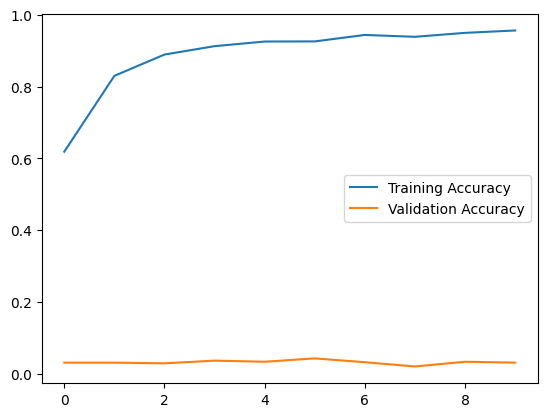

In [54]:
# Plot training history
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.savefig(f"{working_dir}/mobile_net{epochs}_model_accuracy.jpg")
plt.show()

In [55]:
blob = bucket.blob(f"{storageLocation+document_id}/val/training_plot{document_id}.jpg")
blob.upload_from_filename(f'{working_dir}/mobile_net{epochs}_model_accuracy.jpg')
blob.make_public()

In [56]:
validationref=today_ref.collection('Val')

In [57]:
valhistory_ref=validationref.document('history')
valaccuracy_ref=validationref.document('accuracy_plot')

In [58]:
valhistory_ref.set(
    model_history.history
)

update_time {
  seconds: 1726037859
  nanos: 472886000
}

In [59]:
valaccuracy_ref.set({
    'url':blob.public_url
})

update_time {
  seconds: 1726037862
  nanos: 466051000
}

### Evaluation

In [60]:
test_loss, test_accuracy = ayushVision_MobileNetV3_Model.evaluate(test_ds_gen)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

  1/100 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 0.0000e+00 - loss: 1640.2012

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 2039s 21s/step - accuracy: 0.0302 - loss: 1645.1375
Test Accuracy: 3.25%


In [61]:
testref=today_ref.collection('Test')

In [62]:
test_accuracy_loss=testref.document('test_accuracy_lost')
test_accuracy_loss.set({
    'accuracy':test_accuracy,
    'loss':test_loss
})

update_time {
  seconds: 1726040104
  nanos: 152891000
}

In [63]:
modelref=today_ref.collection('Model')

In [64]:
ayushVision_MobileNetV3_Model.save(f'{working_dir}/mobile_net_root_{epochs}.h5',)

In [65]:
savemodel=modelref.document('model')

In [66]:
blob = bucket.blob(f"{storageLocation+document_id}/model/mobile_net_root_{epochs}.h5")
blob.upload_from_filename(f'{working_dir}/mobile_net_root_{epochs}.h5')
blob.make_public()
h5model=blob.public_url

In [67]:
savemodel.set({'model':h5model})

update_time {
  seconds: 1726040118
  nanos: 650747000
}

In [ ]:
directory_path = 'sample/predict'
files = os.listdir(directory_path)

for file in files:
    image_path = os.path.join(directory_path, file)

    if os.path.isfile(os.path.join(directory_path, file)):
        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0
        # Make a prediction
        prediction = model.predict(img_array)
        print(prediction)


        predicted_class_index = np.argmax(prediction)

        # Define your class labels
        class_labels = ['cat', 'dog']

        # Get the corresponding class label
        predicted_class_label = class_labels[predicted_class_index]

        # Get the confidence score for the predicted class
        confidence_score = prediction[0, predicted_class_index]

        # Display the results
        print(f'Predicted Class: {predicted_class_label}')
        print(f'Confidence Score: {confidence_score * 100:.2f}%')
